微分方程式を定義

In [64]:
import sympy as sy

alpha, beta, gamma = sy.symbols('alpha, beta, gamma')
p1, p2, p3, p4, p5, p6 = sy.symbols('p1, p2, p3, p4, p5, p6')
k_a_1, k_a_2, k_a_3, k_b_1, k_b_2, k_b_3 = sy.symbols('k_a_1, k_a_2, k_a_3, k_b_1, k_b_2, k_b_3')
n, F_G, F_E, V_G, V_I, I_B, H, h = sy.symbols('n, F_G, F_E, V_G, V_I, I_B, H, h')

G, Ii, Ip, Is, E, i = sy.symbols('G, Ii, Ip, Is, E, i')
FI = sy.Symbol('FI')
S = sy.Symbol('S')

dG = -i * k_a_2*G / (k_b_2 + G) \
    - (p1*i*G - H) \
        - (k_a_3*G / (k_b_3 + G)) \
            + (F_G + p5*p6*E)/V_G
dIi = p3*Ip - p2*Ii
dIp = alpha*(sy.Max(0, Is) + I_B) \
    - p3*Ip - p4*Ip + FI/V_I
dIs = beta*gamma*(G - h) - n*Is
dE = F_E - p5*E
di = S * (k_a_1*Ii / (k_b_1+Ii))

X = sy.Matrix([G, Ii, Ip, Is, E, i])
X_dot = sy.Matrix([dG, dIi, dIp, dIs, dE, di])
X_dot


⎡   G⋅i⋅kₐ ₂              G⋅kₐ ₃        E⋅p₅⋅p₆ + F_G⎤
⎢- ───────── - G⋅i⋅p₁ - ───────── + H + ─────────────⎥
⎢  G + k_b_2            G + k_b_3            V_G     ⎥
⎢                                                    ⎥
⎢                   -Ii⋅p₂ + Ip⋅p₃                   ⎥
⎢                                                    ⎥
⎢      FI                                            ⎥
⎢     ─── - Ip⋅p₃ - Ip⋅p₄ + α⋅(I_B + Max(0, Is))     ⎥
⎢     V_I                                            ⎥
⎢                                                    ⎥
⎢                -Is⋅n + β⋅γ⋅(G - h)                 ⎥
⎢                                                    ⎥
⎢                    -E⋅p₅ + F_E                     ⎥
⎢                                                    ⎥
⎢                     Ii⋅S⋅kₐ ₁                      ⎥
⎢                     ──────────                     ⎥
⎣                     Ii + k_b_1                     ⎦

In [65]:
# ヤコビ行列
Jacobian = X_dot.jacobian(X)
Jacobian

⎡  G⋅i⋅kₐ ₂        G⋅kₐ ₃        i⋅kₐ ₂              kₐ ₃                     
⎢──────────── + ──────────── - ───────── - i⋅p₁ - ─────────               0   
⎢           2              2   G + k_b_2          G + k_b_3                   
⎢(G + k_b_2)    (G + k_b_3)                                                   
⎢                                                                             
⎢                            0                                           -p₂  
⎢                                                                             
⎢                            0                                            0   
⎢                                                                             
⎢                           β⋅γ                                           0   
⎢                                                                             
⎢                            0                                            0   
⎢                                                   

In [66]:
weight = 60
params = [
    (alpha, 0.5417),
    (beta, 1.0),
    (gamma, 0.1457),
    (p1, 0.1503),
    (p2, 0.1560),
    (p3, 0.1643),
    (p4, 0.1212),
    (p5, 0.5719),
    (p6, 0.2872),
    (k_a_1, 1.0),
    (k_a_2, 0.3746),
    (k_a_3, 0.3095),
    (k_b_1, 171.0552),
    (k_b_2, 94.4792),
    (k_b_3, 8.0479),
    (n, 5.9027), # 腎に関係するインスリン係数
    (F_G, 2.86*weight), # 注射器によるグルコース投入(1kg当たり2.86の投入)
    (F_E, 2.86*weight), # 経腸グルコース投入率(1kg当たり2.86の投入)
    (V_G, 1.88), # グルコース分布容量
    (V_I, 120.0),  # インスリン分布容量
    (I_B, 13.3909), # 基礎インスリン率
    (H, 0.7686), # 閾値1
    (h, 107.4),  # 閾値2
]

解く

[200.   50.   50.   40.  130.    0.8]
[200.   50.   50.   40.  130.    0.8]
[202.     50.5    50.5    40.4   131.3     0.808]
[204.00017676  51.00004419  51.00004419  40.80003535 132.60011489
   0.81600071]
[206.09027309  51.52256827  51.52256827  41.21805462 133.95867751
   0.82436109]
[216.67276783  54.16819196  54.16819196  43.33455357 140.83729909
   0.86669107]
[218.63762939  54.65940735  54.65940735  43.72752588 142.1144591
   0.87455052]
[221.07635302  55.26908826  55.26908826  44.2152706  143.69962946
   0.88430541]
[221.0351604   55.2587901   55.2587901   44.20703208 143.67285426
   0.88414064]
[263.73609125  65.93402281  65.93402281  52.74721825 171.42845931
   1.05494437]
[294.36693849  73.59173462  73.59173462  58.8733877  191.33851002
   1.17746775]
[489.70544248 122.42636062 122.42636062  97.9410885  318.30853761
   1.95882177]
[552.8544904  138.2136226  138.2136226  110.57089808 359.35541876
   2.21141796]
[606.2848014  151.57120035 151.57120035 121.25696028 394.08512091

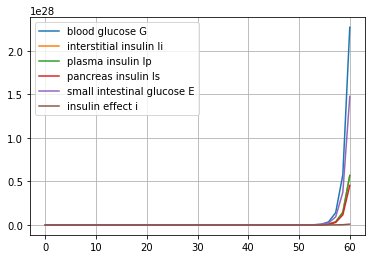

In [69]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.facecolor'] = 'white'


_func_X_dot = sy.lambdify((G, Ii, Ip, Is, E, i, S, FI), X.subs(params), "numpy")

def func_X_dot(t, X, sen, input):
    print(X)
    return _func_X_dot(X[0], X[1], X[2], X[3], X[4], X[5], sen, input).ravel()



X0 = np.array([200,50,50,40,130,0.8])


func_X_dot(0, X0, 0, 0)

sol = integrate.solve_ivp(
    fun=func_X_dot,
    t_span=[0,60],
    y0=X0,
    args=(0.3, 100)
)
plt.plot(sol.t, sol.y[0], label="blood glucose G")
plt.plot(sol.t, sol.y[1], label="interstitial insulin Ii")
plt.plot(sol.t, sol.y[2], label="plasma insulin Ip")
plt.plot(sol.t, sol.y[3], label="pancreas insulin Is")
plt.plot(sol.t, sol.y[4], label="small intestinal glucose E")
plt.plot(sol.t, sol.y[5], label="insulin effect i")
plt.grid()
plt.legend()
plt.show()